In [2]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Add, concatenate
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np 
from random import random
import time
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import keras.backend as K
import pickle
from keras.initializers import RandomUniform, TruncatedNormal

In [3]:
with open("/content/concatenated_matrix_with_passive.pickle", "rb") as pickle_file:
    content1 = pickle.load(pickle_file)

In [4]:
with open("/content/features.pickle", "rb") as pickle_file:
    content2 = pickle.load(pickle_file) 

In [26]:
x = content1[:,:-1]
y = content1[:,-1]
y = np.asanyarray(y)
x =  np.asanyarray(x)
x1 = content2
x1 = np.asanyarray(x1)
#X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=23)

In [29]:
y = np.reshape(y, (17000,1))

In [59]:
X = np.concatenate((x,x1),axis= 1) 
XY = np.concatenate((X,y), axis = 1)
np.shape(X)

(17000, 37)

In [54]:
XY = XY.astype(float)

In [60]:
XY = XY[~np.isnan(XY).any(axis=1)]
np.shape(XY)

(14825, 38)

In [56]:
XY

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.11111111e-01, 9.99941173e-01, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.77777778e-01, 9.99823519e-01, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.44444444e-01, 9.99705865e-01, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.77777778e-01, 1.17653980e-04, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.22222222e-01, 5.88269898e-05, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.77777778e-01, 0.00000000e+00, 1.00000000e+00]])

In [57]:
XY = XY[~np.isfinite(XY).any(axis=1)]
np.shape(XY)

(0, 38)

In [61]:
import plotly.express as px
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(XY[:,:-1])

In [63]:
fig = px.scatter(components, x=0, y=1, color=XY[:,-1])
fig.show()

In [64]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [65]:
kmean=KMeans(n_clusters=3)
kmean.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [66]:
kmean.cluster_centers_

array([[1.69836282e-01, 1.53795270e-01, 0.00000000e+00, 1.98776253e-01,
        1.62725318e-01, 2.05391103e-01, 7.43674549e-01, 0.00000000e+00,
        1.97122540e-01, 1.89515462e-01, 3.30742517e-01, 3.35207541e-01,
        3.38680337e-01, 3.34380685e-01, 3.34711427e-01, 3.09244253e-01,
        1.00000000e+00, 3.30411774e-01, 3.24623780e-01, 3.37522739e-01,
        2.93533984e-01, 3.24458409e-01, 1.93484372e-01, 1.91003804e-01,
        1.28493468e-01, 2.94526211e-01, 9.89250868e-01, 2.93203241e-01,
        3.13874649e-01, 1.92326774e-01, 7.27334527e-02],
       [2.12125840e-01, 1.92730605e-01, 0.00000000e+00, 2.49083690e-01,
        1.90439829e-01, 2.26485497e-14, 1.18238752e-14, 0.00000000e+00,
        2.48014661e-01, 2.30146610e-01, 4.25320709e-01, 4.22113622e-01,
        4.14935858e-01, 4.24709835e-01, 4.20586439e-01, 7.63591936e-03,
        9.16310324e-03, 4.24862553e-01, 4.17837508e-01, 4.21350031e-01,
        3.82406842e-01, 4.09896151e-01, 2.41295052e-01, 2.40836897e-01,
       

Cluster 1 Inertia 96349.00203268921
Cluster 2 Inertia 86268.42659816214
Cluster 3 Inertia 79790.8460568354
Cluster 4 Inertia 76112.2137627629
Cluster 5 Inertia 73216.60201443773
Cluster 6 Inertia 70603.00905794773
Cluster 7 Inertia 68239.79324049057
Cluster 8 Inertia 66573.33180344816
Cluster 9 Inertia 64989.915442136626
Cluster 10 Inertia 63595.59592662173
Cluster 11 Inertia 62160.229103041755
Cluster 12 Inertia 61093.938147842295
Cluster 13 Inertia 60093.04321974853
Cluster 14 Inertia 59138.71703404803
Cluster 15 Inertia 58301.263755029795
Cluster 16 Inertia 57619.740579634774
Cluster 17 Inertia 56831.78906892209
Cluster 18 Inertia 56085.78484355348
Cluster 19 Inertia 55480.116058593936


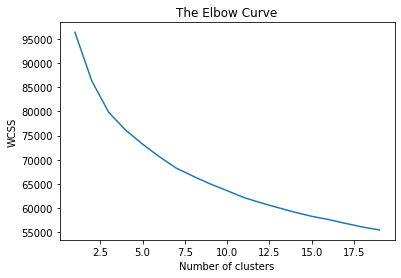

In [67]:
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
 kmeans.fit(x)
 wcss.append(kmeans.inertia_)
 print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") ##WCSS stands for total within-cluster sum of square
plt.show()